In [5]:
# import requests as req

# Для работы с таблицами
import pandas as pd
import numpy as np

# Для работы со смайликами в тексте
import emoji

# Для превращения смайликов в слова
import demoji

# pip install googletrans==3.1.0a0
# Переводчик
import googletrans
from googletrans import Translator

In [6]:
import nltk
from nltk.corpus import stopwords
import pymorphy3
from tqdm.auto import tqdm
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from gensim.corpora import Dictionary
from gensim.models import LdaModel

nltk.download('stopwords')

c:\Users\melni\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Telegram (проверка данных, полученных с помощью парсера)

In [7]:
df_telegram = pd.read_csv('chats.csv')

In [8]:
df_telegram.head(10)

,message
0,#рекаморе\r\n\r\nВидео:\r\nЯн Сильченко
1,Подведомственные Росморречфлоту вузы приняли у...
2,NaN
3,Вот и лето прошло….\r\n\r\nСегодня в рубрике #...
4,⚡️В Камском бассейне перевыполнили план дноугл...
5,Ушаковцы победили в конкурсе для молодых специ...
6,В рубрике #Флот сегодня расскажем про многофун...
7,NaN
8,NaN
9,NaN


In [9]:
df_telegram.iloc[1].message

'Подведомственные Росморречфлоту вузы приняли участие в Всероссийском Конгрессе молодых учёных в «Сириусе».\r\n\r\nМероприятие собрало около 8 тысяч участников из 88 регионов страны и 1300 иностранных гостей из 90 стран.\r\n\r\nВ рамках Конгресса состоялась церемония награждения победителей конкурсов «Молодые учёные транспортной отрасли» и «Лучший студенческий реферат». \r\n\r\nПоздравляем наших студентов и преподавателей с успехами!\r\n\r\n🖥Росморречфлот в MAX | ВК'

In [10]:
len(df_telegram)

3000

In [11]:
df_telegram = df_telegram.dropna()

In [12]:
set_text = []
for name in df_telegram['message']:
    set_text.append(name)

In [13]:
set_text

['#рекаморе\r\n\r\nВидео:\r\nЯн Сильченко',
 'Подведомственные Росморречфлоту вузы приняли участие в Всероссийском Конгрессе молодых учёных в «Сириусе».\r\n\r\nМероприятие собрало около 8 тысяч участников из 88 регионов страны и 1300 иностранных гостей из 90 стран.\r\n\r\nВ рамках Конгресса состоялась церемония награждения победителей конкурсов «Молодые учёные транспортной отрасли» и «Лучший студенческий реферат». \r\n\r\nПоздравляем наших студентов и преподавателей с успехами!\r\n\r\n🖥Росморречфлот в MAX | ВК',
 'Вот и лето прошло….\r\n\r\nСегодня в рубрике #ТрудовыеБудни новости от коллег из Администрации Двинско-Печорского бассейна.\r\n\r\n🔵Наступил период интенсивной деятельности ремонтных баз учреждения - начало межнавигационного судоремонта. \r\nВсе суда вернулись в места своей зимней дислокации.\r\n🔵Завершена зимняя загрузка судоподъёмных средств для очередного освидетельствования РКО. \r\n🔵Береговыми специалистами ведутся \xa0работы по очистке корпусов судов.\r\n🔵Проводится деф

In [14]:
len(set_text)

1248

In [15]:
set_text = [line.strip() for line in set_text]

In [16]:
set_text

['#рекаморе\r\n\r\nВидео:\r\nЯн Сильченко',
 'Подведомственные Росморречфлоту вузы приняли участие в Всероссийском Конгрессе молодых учёных в «Сириусе».\r\n\r\nМероприятие собрало около 8 тысяч участников из 88 регионов страны и 1300 иностранных гостей из 90 стран.\r\n\r\nВ рамках Конгресса состоялась церемония награждения победителей конкурсов «Молодые учёные транспортной отрасли» и «Лучший студенческий реферат». \r\n\r\nПоздравляем наших студентов и преподавателей с успехами!\r\n\r\n🖥Росморречфлот в MAX | ВК',
 'Вот и лето прошло….\r\n\r\nСегодня в рубрике #ТрудовыеБудни новости от коллег из Администрации Двинско-Печорского бассейна.\r\n\r\n🔵Наступил период интенсивной деятельности ремонтных баз учреждения - начало межнавигационного судоремонта. \r\nВсе суда вернулись в места своей зимней дислокации.\r\n🔵Завершена зимняя загрузка судоподъёмных средств для очередного освидетельствования РКО. \r\n🔵Береговыми специалистами ведутся \xa0работы по очистке корпусов судов.\r\n🔵Проводится деф

In [17]:
df_telegram = pd.DataFrame(set_text, columns = ['text'])
df_telegram['goal'] = 'РосМорРечФлот'
df_telegram[:2]

,text,goal
0,#рекаморе\r\n\r\nВидео:\r\nЯн Сильченко,РосМорРечФлот
1,Подведомственные Росморречфлоту вузы приняли у...,РосМорРечФлот


# Извелчение смайликов из текстов сообщений

In [18]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.EMOJI_DATA)

In [19]:
emoji_chat = [extract_emojis(s) for s in set_text]

In [20]:
emoji_chat

['',
 '🖥',
 '🔵🔵🔵🔵🔵🔵🖥',
 '⚡🖥',
 '🥇🥈🖥',
 '🖥',
 '📍🖥',
 '🖥',
 '🖥',
 '❓🖥',
 '🖥',
 '🖥',
 '',
 '👋🦅',
 '🖥',
 '🖥',
 '🖥',
 '🚚🔺🗺🚘🚢👷🏻♀🎓',
 '🖥',
 '🖥',
 '🦅',
 '🖥',
 '🖥',
 '⚡🖥',
 '⚡🖥',
 '🖥',
 '🔗',
 '',
 '',
 '🖥',
 '🖥',
 '🖥',
 '',
 '',
 '🖥',
 '🖥',
 '🖥',
 '🤼🤼♀🤼♂🤼',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '❓',
 '🔵🔵🔵',
 '',
 '',
 '',
 '',
 '⚡',
 '⬇▶▶▶▶🦅',
 '⚡',
 '',
 '🔵🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '',
 '📶',
 '',
 '🛰',
 '',
 '⚡',
 '⭕⭕⭕⭕⭕⭕⭕🦅',
 '',
 '🔵🔵🔵👆',
 '⚡',
 '🗺',
 '🛳',
 '🔵🔵🔵🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '⚡',
 '',
 '↗',
 '⚡',
 '',
 '',
 '📱',
 '🔵🔵',
 '❗',
 '',
 '',
 '',
 '📍📍',
 '✅✅✅',
 '',
 '',
 '',
 '',
 '🔵🔵',
 '🔵🔵🔵',
 '🏗✅🛳',
 '❓',
 '',
 '',
 '⚡',
 '🛳⬆🦅',
 '⚡',
 '⚡',
 '',
 '🔵🔵🔵🔵🔵🔵⭐👆',
 '⏪⏩⬆🦅',
 '🌊',
 '❓🔵🔵🔵',
 '📆',
 '🔵🔵🔵🔵',
 '',
 '',
 '',
 '',
 '',
 '👇',
 '',
 '🔵🔵🔵🔵',
 '⏪⏩🦅',
 '',
 '',
 '',
 '📱',
 '',
 '⚡',
 '🔍🔵🔵🔵🔵🔵🔵🔵',
 '🦅',
 '📄📄',
 '🛳',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '⚡',
 '⚡',
 '',
 '👍',
 '⚡',
 '',
 '↖↖🟦🟦🟦🟦',
 '',
 '',
 '🔵🔵🔵🔵',
 '⚡',
 '🗺',
 '🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵👆',
 '⚡🔵🔵🔵',
 '🔵🔵',
 '⚡',
 '⚡',
 ''

In [21]:
emoji_chat_set = set(''.join(emoji_chat))
emoji_chat_set = ''.join(emoji_chat_set)
emoji_chat_set

'⭕⏩🪝💻🤝⚕👇⚽⏭⌛🔒▪🤍📍🌊🛢🪢🍊🌏🧰🏅🍐📣🔴🎉📁📺💫🥉🧭ℹ↪🔍🌱🆗🦅⏺✨🚂🚍🏛📃🏝🚨📄🧑📌🏆🔗✏📹🥈⛏❓📦💪🍏✅📜⛓❌🌾📰🕛🙌⏪❕🎖‼⬆↖🎓🤼🏖📎🗺📩💧🧵🔹🟩🚊⭐⚓📢☝🍎🔡🌟🌐🛳🍂👥🛣🌉🖥🚘📶🚩🔺⛴❗🔧❤💠🧫🌷👤🏄🔵⚙⚪🚞🔥🎨📷🤖🏢🛟🗣🏋⌨💬🎥🎼🐟📑🧱💐📝🚜🤩🟡👩🪨✈🥇🏻🟣⛹▶📆👨🛹🚚🫡📚🚢🔎💥↗🔬☀🔔🎄✉🤷✔📕📱🟢🔊🏷📅🎞♂🧹🚗🔑🗓👋🌍🎬🟦⚡🏨🪚📸👀⛪👍🧊🔖🚆🛩🛥⏮🌡➡♀✍🛰❄🍽🛠⬇🏫🎺👆🌌⚒📊🌿🕹☑🖼⛵👷📐📞🛤🤿✊💯🔤🏗📈🕑🛶🎶👏🌅🏭'

In [22]:
# demoji.download_codes()

In [23]:
# Декодирования смайликов
dict_emoj = demoji.findall(''.join(emoji_chat))

In [24]:
# Создаем словарь
res = []
for key in dict_emoj.keys(): res.append(dict_emoj[key])

In [25]:
res

['hollow red circle',
 'fast-forward button',
 'hook',
 'laptop',
 'handshake',
 'medical symbol',
 'backhand index pointing down',
 'soccer ball',
 'next track button',
 'hourglass done',
 'locked',
 'black small square',
 'white heart',
 'round pushpin',
 'water wave',
 'oil drum',
 'knot',
 'tangerine',
 'globe showing Asia-Australia',
 'toolbox',
 'sports medal',
 'pear',
 'megaphone',
 'red circle',
 'party popper',
 'file folder',
 'television',
 'dizzy',
 '3rd place medal',
 'compass',
 'information',
 'left arrow curving right',
 'magnifying glass tilted left',
 'seedling',
 'OK button',
 'eagle',
 'record button',
 'sparkles',
 'locomotive',
 'oncoming bus',
 'classical building',
 'page with curl',
 'desert island',
 'police car light',
 'page facing up',
 'person',
 'pushpin',
 'trophy',
 'link',
 'pencil',
 'video camera',
 '2nd place medal',
 'pick',
 'red question mark',
 'package',
 'flexed biceps',
 'green apple',
 'check mark button',
 'scroll',
 'chains',
 'cross mark

In [26]:
translator = Translator()
result = translator.translate(res, src='en', dest='ru')

In [27]:
print(googletrans.LANGUAGES)

{'abk': 'abkhaz', 'ace': 'acehnese', 'ach': 'acholi', 'aar': 'afar', 'af': 'afrikaans', 'sq': 'albanian', 'alz': 'alur', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'as': 'assamese', 'ava': 'avar', 'awa': 'awadhi', 'ay': 'aymara', 'az': 'azerbaijani', 'ban': 'balinese', 'bal': 'baluchi', 'bm': 'bambara', 'bci': 'baoulé', 'bak': 'bashkir', 'eu': 'basque', 'btx': 'batak karo', 'bts': 'batak simalungun', 'bbc': 'batak toba', 'be': 'belarusian', 'bem': 'bemba', 'bn': 'bengali', 'bew': 'betawi', 'bho': 'bhojpuri', 'bik': 'bikol', 'bs': 'bosnian', 'bre': 'breton', 'bg': 'bulgarian', 'bua': 'buryat', 'yue': 'cantonese', 'ca': 'catalan', 'ceb': 'cebuano', 'cha': 'chamorro', 'che': 'chechen', 'zh': 'chinese', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'chk': 'chuukese', 'chv': 'chuvash', 'co': 'corsican', 'crh': 'crimean tatar', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'fa-af': 'dari', 'dv': 'dhivehi', 'din': 'dinka', 'doi': 'dogri', 'dom': 'dombe', 'nl': 

In [28]:
# print(result.text)

https://dev-gang.ru/article/perevod-teksta-s-pomosczu-google-translate-api-v-python-ahgm88wx1k/

# Обработка текстов

In [29]:
df_telegram

,text,goal
0,#рекаморе\r\n\r\nВидео:\r\nЯн Сильченко,РосМорРечФлот
1,Подведомственные Росморречфлоту вузы приняли у...,РосМорРечФлот
2,Вот и лето прошло….\r\n\r\nСегодня в рубрике #...,РосМорРечФлот
3,⚡️В Камском бассейне перевыполнили план дноугл...,РосМорРечФлот
4,Ушаковцы победили в конкурсе для молодых специ...,РосМорРечФлот
...,...,...
1243,⚡️Роман Старовойт назначен Министром транспорт...,РосМорРечФлот
1244,⚓️В пансионате «Моряк» в Можайском районе Моск...,РосМорРечФлот
1245,⚡Государственная Дума утвердила кандидатуру Ро...,РосМорРечФлот
1246,⚡️Государственная Дума утвердила кандидатуру В...,РосМорРечФлот


In [30]:
result = []

for i in range(len(df_telegram)):
    text = df_telegram.iloc[i].iloc[0]

    #Удаление эмоджи
    text = ''.join([c for c in text if c not in emoji_chat_set])

    # text = text.replace('\n', '').replace('\r', '').replace('\t', '')
    regex = re.compile(r'[\n\r\t]')
    text = regex.sub(' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    # text = ' '.join(text.split()).lower()
    text = re.sub(r'\s+', ' ', text).lower()

    result.append(text)

df = pd.DataFrame(result, columns=['posts'])
df

C:\Users\melni\AppData\Local\Temp\ipykernel_22748\1876747471.py:1: RuntimeWarning: coroutine 'Translator.translate' was never awaited
  result = []


,posts
0,рекаморе видео ян сильченко
1,подведомственные росморречфлоту вузы приняли у...
2,вот и лето прошло сегодня в рубрике трудовыебу...
3,в камском бассейне перевыполнили план дноуглуб...
4,ушаковцы победили в конкурсе для молодых специ...
...,...
1243,роман старовойт назначен министром транспорта ...
1244,в пансионате моряк в можайском районе московск...
1245,государственная дума утвердила кандидатуру ром...
1246,государственная дума утвердила кандидатуру вит...


Text(0, 0.5, 'Частота')

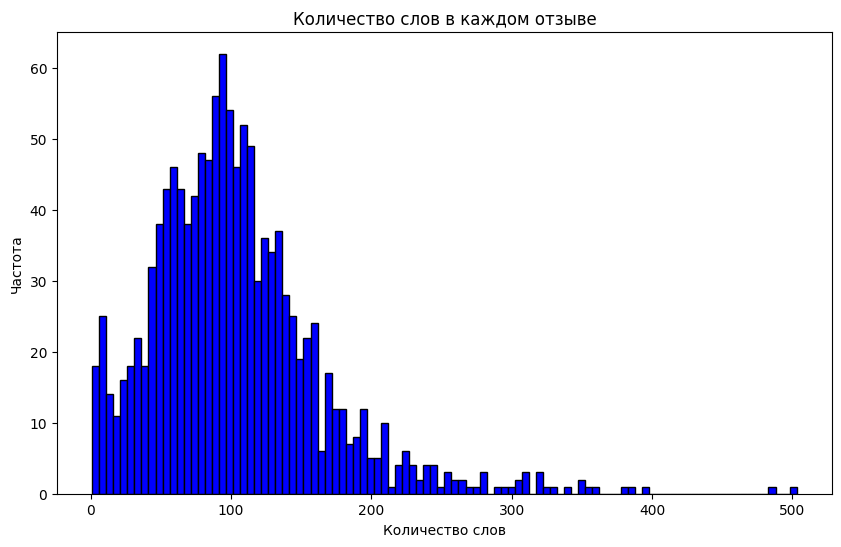

In [31]:
df['word_count'] = df['posts'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=100, color='blue', edgecolor='black')
plt.title('Количество слов в каждом отзыве')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

In [32]:
df[df['word_count'] > 375]

,posts,word_count
321,в нашей еженедельной рубрике ауреки рассказыва...,395
377,собрали подборку куда можно съездить летом и п...,485
383,вы начинающий диспетчер по движению судов на в...,382
606,опорафлота часть 2 рахматов эдуард николаевич ...,385
607,опорафлота часть 1 рахматов эдуард николаевич ...,503


In [33]:
# Уберем строки, где 'word_count' больше 375
texts_was = df.shape[0]
print(f"Было строк до фильтрации : {texts_was}")
df = df[df['word_count'] <= 375]

texts_now = df.shape[0]
print(f"Оставлено строк после фильтрации : {texts_now}")
print(f"Удалено {texts_was - texts_now} строк")
df

Было строк до фильтрации : 1248
Оставлено строк после фильтрации : 1243
Удалено 5 строк


,posts,word_count
0,рекаморе видео ян сильченко,4
1,подведомственные росморречфлоту вузы приняли у...,56
2,вот и лето прошло сегодня в рубрике трудовыебу...,82
3,в камском бассейне перевыполнили план дноуглуб...,43
4,ушаковцы победили в конкурсе для молодых специ...,75
...,...,...
1243,роман старовойт назначен министром транспорта ...,33
1244,в пансионате моряк в можайском районе московск...,84
1245,государственная дума утвердила кандидатуру ром...,142
1246,государственная дума утвердила кандидатуру вит...,167


# Лематизация

In [34]:
# создаём морфологический анализатор
morph = pymorphy3.MorphAnalyzer()

if 'russian_stopwords' not in locals():
      russian_stopwords = stopwords.words("russian")

texts_as_lists = []

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^а-яё]', ' ', text) # Удаление пунктуации, кроме пробелов
        # разбиваем на слова
        words = text.split()
        # приводим к леммам, убираем стоп-слова и короткие слова
        lemmas = [morph.parse(word)[0].normal_form for word in words if word not in russian_stopwords and len(word) > 2]
        texts_as_lists.append(lemmas)
        return " ".join(lemmas)
    return "" # Возвращаем пустую строку для нестроковых значений

print("\nНачало предобработки текста...")
# Применение предобработки к столбцу с текстом. Используем tqdm для отслеживания прогресса.
if 'posts' in df.columns:
    tqdm.pandas()
    df['posts'] = df['posts'].progress_apply(preprocess_text)
    print("Предобработка текста завершена.")
    display(df)


Начало предобработки текста...


100%|██████████| 1243/1243 [00:07<00:00, 175.38it/s]

Предобработка текста завершена.



C:\Users\melni\AppData\Local\Temp\ipykernel_22748\3189719577.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posts'] = df['posts'].progress_apply(preprocess_text)


,posts,word_count
0,рекамора видео сильченко,4
1,подведомственный росморречфлот вуз принять уча...,56
2,лето пройти сегодня рубрика трудовыебудни ново...,82
3,камский бассейн перевыполнить план дноуглубите...,43
4,ушаковца победить конкурс молодой специалист т...,75
...,...,...
1243,роман старовойт назначить министр транспорт ро...,33
1244,пансионат моряк можайский район московский обл...,84
1245,государственный дума утвердить кандидатура ром...,142
1246,государственный дума утвердить кандидатура вит...,167


# Векторизация

In [35]:
# Векторизация текста
count_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2), stop_words=russian_stopwords, max_df=0.8, min_df=2)
dataset = count_vectorizer.fit_transform(df['posts'])

# Модель

In [36]:
lda = LDA(n_components = 5,
         max_iter=10,
         n_jobs=-1,
         learning_method='batch',
         random_state=42)
lda.fit(dataset)

LatentDirichletAllocation(n_components=5, n_jobs=-1, random_state=42)

In [37]:
# Функция для визуализации 10 самых значимых слов в каждой теме
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема {topic_idx + 1}:", ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [38]:
tf_feature_names = count_vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, 10)

Тема 1: росморречфлот, морской, порт, развитие, год, транспорт, проект, морской порт, транспортный, россия
Тема 2: росморречфлот, вуз, морской, судно, отраслевой, год, учебный, имя, курсант, который
Тема 3: бассейн, работа, год, администрация, водный, судно, навигация, путь, водный путь, канал
Тема 4: год, морской, флот, наш, россия, победа, день, речной, море, великий
Тема 5: судно, работа, танкер, судный, морспасслужба, мазут, акватория, волгонефть, ликвидация, часть


# Темы

Тема 1: Водные проекты России 
Тема 2: Корабли и учёба 
Тема 3: География водоёмо 
Тема 4: Морская история 
Тема 5: Нефть и аварии

# Облако слов

In [39]:
import plotly.express as px

# Интерактивное облако слов
from wordcloud import WordCloud

def plot_interactive_topics(lda_model, feature_names, n_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    
    return pd.DataFrame(topics)

In [43]:
plot_interactive_topics(lda, tf_feature_names)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,росморречфлот,росморречфлот,бассейн,год,судно
1,морской,вуз,работа,морской,работа
2,порт,морской,год,флот,танкер
3,развитие,судно,администрация,наш,судный
4,год,отраслевой,водный,россия,морспасслужба
5,транспорт,год,судно,победа,мазут
6,проект,учебный,навигация,день,акватория
7,морской порт,имя,путь,речной,волгонефть
8,транспортный,курсант,водный путь,море,ликвидация
9,россия,который,канал,великий,часть


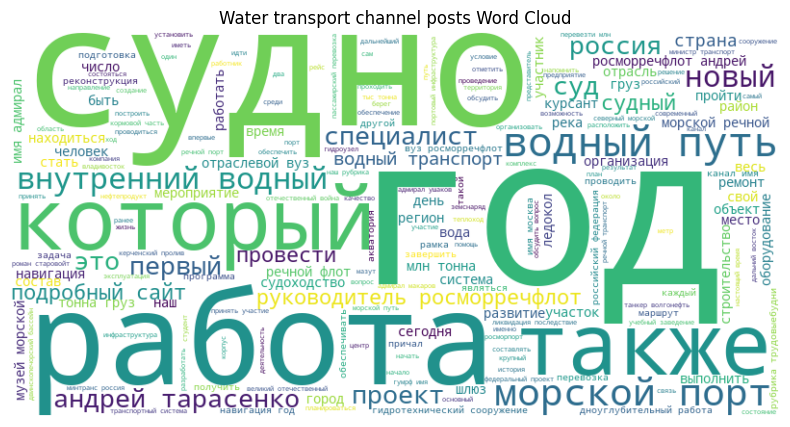

In [52]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(''.join(list(df['posts'])))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Water transport channel posts Word Cloud")
plt.show()

# Gensim

In [41]:
# Предобработка текста для тематического моделирования в gensim
# Для тематического моделирования часто полезно удалить очень редкие и очень частые слова

# Создание словаря
gensim_dictionary = Dictionary(texts_as_lists)

# Фильтрация слов: удаление очень редких (меньше 5 документов) и очень частых (встречаются более чем в 50% документов)
gensim_dictionary.filter_extremes(no_below=5, no_above=0.5)

# Создание корпуса (мешок слов)
corpus = [gensim_dictionary.doc2bow(text, allow_update=True) for text in texts_as_lists]

print(f"Создан словарь с {len(gensim_dictionary)} уникальными токенами.")
print(f"Создан корпус из {len(corpus)} документов.")

Создан словарь с 8807 уникальными токенами.
Создан корпус из 1243 документов.


In [42]:
# Применение алгоритма LDA
# Выбираем количество тем.
num_topics = 10 # Например, 10 тем

print(f"\nОбучение модели LDA с {num_topics} темами...")
# Обучение LDA модели
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=gensim_dictionary, passes=15) # Увеличиваем passes для лучшей сходимости

print("Обучение LDA модели завершено.")

# Интерпретация тем
print("\nВыявленные темы:")
topics = lda_model.print_topics(num_words=10) # Выводим 10 наиболее значимых слов для каждой темы

for topic_id, topic_words in topics:
    print(f"Тема #{topic_id + 1}: {topic_words}")


Обучение модели LDA с 10 темами...


Обучение LDA модели завершено.

Выявленные темы:
Тема #1: 0.013*"курсант" + 0.013*"вуз" + 0.012*"имя" + 0.012*"адмирал" + 0.010*"морской" + 0.010*"росморречфлот" + 0.008*"год" + 0.008*"студент" + 0.008*"учебный" + 0.008*"отраслевой"
Тема #2: 0.024*"порт" + 0.023*"морской" + 0.022*"год" + 0.009*"судно" + 0.008*"росморречфлот" + 0.007*"груз" + 0.007*"навигация" + 0.007*"война" + 0.006*"день" + 0.006*"первый"
Тема #3: 0.019*"работа" + 0.013*"танкер" + 0.011*"волгонефть" + 0.009*"часть" + 0.008*"мазут" + 0.008*"морспасслужба" + 0.008*"затонуть" + 0.008*"водолаз" + 0.007*"акватория" + 0.007*"судно"
Тема #4: 0.031*"судно" + 0.010*"проект" + 0.009*"флот" + 0.008*"характеристика" + 0.008*"морской" + 0.007*"год" + 0.007*"ледокол" + 0.007*"рубрика" + 0.007*"судный" + 0.007*"наш"
Тема #5: 0.021*"год" + 0.017*"бассейн" + 0.017*"путь" + 0.016*"судно" + 0.015*"водный" + 0.013*"работа" + 0.011*"администрация" + 0.010*"навигация" + 0.009*"внутренний" + 0.008*"тонна"
Тема #6: 0.015*"танкер" + 0.015*"ра